In [49]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
#If it doesnot work use:
#    conda install -c conda-forge textacy spacy
#    conda install -c conda-forge nltk 
#    python -m spacy download es # If spanish
#    python -m spacy download en # If english
import textacy
from collections import Counter, defaultdict
import warnings; warnings.simplefilter('ignore')
import spacy

# función auxiliar
def leer_texto(texto):
    """Funcion auxiliar para leer un archivo de texto"""
    with open(texto, 'r', encoding="utf8") as text:
        return text.read()

## Ejercicio: Analizar texto

● Utilizar un texto de proyecto Gutenberg en castellano http://www.gutenberg.org/browse/languages/es.

● Hint: Tutorial para español https://relopezbriega.github.io/blog/2017/09/23/procesamiento-del-lenguaje-natural-con-python/ 

● Usa spacy.io y github.com/chartbeat-labs/textacy 

In [50]:
# Cargando el modelo en español de spacy // https://spacy.io/usage/models
nlp = textacy.load_spacy("es")

In [51]:
texto = leer_texto('LaNarizDeUnNotario.txt')

● Contar palabras y ordenar por frecuencia:

    ● Limpiar preludio y licencia de Project Gutenberg.

In [52]:
refPreludio ="EL ORIENTE Y EL OCCIDENTE SE ACOMETEN: LA SANGRE CORRE YA"
refLicencia ="FIN"
preludio, refPreludio, textoValido = texto.partition(refPreludio)
textoValido, refLicencia, licencia = textoValido.partition(refLicencia)
texto = refPreludio + textoValido
texto[0:100]

"EL ORIENTE Y EL OCCIDENTE SE ACOMETEN: LA SANGRE CORRE YA\n\n\nMaese Alfredo L'Ambert, antes de recibir"

    ● Omitir “palabras vacías” (stop words) y símbolos.

In [53]:
## For dummys like me, 
## First import ntlk
#import nltk
## Then tell python to download stop words from network
# nltk.download('stopwords')
## Then tell python to download punctuation symbols from network
#nltk.download('punkt')

#'''
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
 
example_sent = texto
 
stop_words = set(stopwords.words('spanish')).union( set(string.punctuation) )
# custom ones detected while reading 'LaNarizDeUnNotario.txt'
stop_words.add('--')
stop_words.add('_')
stop_words.add('si')

#print(stop_words)
 
filtered_sentence = [i for i in word_tokenize(example_sent.lower()) if i not in stop_words]
  
#print(word_tokens)
print(filtered_sentence)
textofiltrado = ' '.join(str(s) for s in filtered_sentence)
#'''

['oriente', 'occidente', 'acometen', 'sangre', 'corre', 'maese', 'alfredo', "l'ambert", 'recibir', 'golpe', 'fatal', 'obligó', 'cambiar', 'narices', 'duda', 'alguna', 'notario', 'notable', 'francia', 'época', 'aquella', 'contaba', 'treinta', 'dos', 'años', 'elevada', 'estatura', 'poseía', 'ojos', 'grandes', 'rasgados', 'frente', 'despejada', 'olímpica', 'barba', 'cabellos', 'rubio', 'admirable', 'nariz', 'parte', 'prominente', 'cuerpo', 'retorcía', 'majestuosa', 'forma', 'pico', 'águila', 'aunque', 'alguno', 'crea', 'nítida', 'corbata', 'blanca', 'sentaba', 'maravilla', '¿era', 'debido', 'usaba', 'tierna', 'infancia', 'surtía', 'alguna', 'tienda', 'afamada', 'opino', 'ambas', 'razones', 'tiempo', 'cosa', 'atarse', 'torno', 'cuello', 'pañuelo', 'bolsillo', 'blanco', 'hecho', 'torcida', 'distinta', 'formar', 'arte', 'perfección', 'espléndido', 'nudo', 'inmaculada', 'batista', 'cuyas', 'puntas', 'iguales', 'almidonadas', 'exceso', 'dirigen', 'simétricamente', 'derecha', 'izquierda', 'corb

In [54]:

texto_procesado = nlp(texto)
# Cuántas sentencias hay en el texto?
sentencias = [s for s in texto_procesado.sents]
print(len(sentencias))

1309


In [55]:
# imprimir las primeras 10 sentencias para verificar el texto# imprim 
print(sentencias[1:11])

[En la época aquella contaba treinta y dos años; era de elevada
estatura, y poseía unos ojos grandes y rasgados, una frente despejada y
olímpica, y su barba y sus cabellos eran de un rubio admirable., Su nariz
(la parte más prominente de su cuerpo), se retorcía majestuosa en forma
de pico de águila., Aunque alguno no me crea, su nítida corbata blanca le
sentaba a maravilla., ¿Era debido esto a que la usaba desde su más tierna
infancia, o porque se surtía de ellas en alguna tienda afamada?, Yo opino
que eran ambas razones a un tiempo.

, Una cosa es atarse en torno del cuello un pañuelo de bolsillo blanco,
hecho una torcida, y otra muy distinta formar, con arte y perfección, un
espléndido nudo de inmaculada batista, cuyas puntas iguales, almidonadas
sin exceso, se dirigen simétricamente a derecha e izquierda., Una corbata
blanca elegida con acierto y anudada con esmero no es un adorno sin
gracia; todas las mujeres os dirán lo mismo que yo., Pero no basta
anudársela con maestría y con pr

● Encontrar personajes.

In [56]:
#'PERSON' como esta el ejemplo, no funciona
def encontrar_personajes(doc):
    """
    Devuelve una lista de los personajes de un `doc` con su cantidad de
    ocurrencias
    
    :param doc: NLP documento parseado por Spacy
    :return: Lista de Tuplas con la forma
        [('winston', 686), ("o'brien", 135), ('julia', 85),]
    """
    
    personajes = Counter()
    for ent in doc.ents:
        if ent.label_ == 'PER': 
            personajes[ent.lemma_] += 1
            #print("Encontro un personaje")
            
    return personajes.most_common()

In [57]:
# Extrayendo los personajes principales del texto y contando cuantas veces
# son nombrados.
print(encontrar_personajes(texto_procesado)[:20])

[("L'Ambert", 36), ('Romagné', 25), ("M. L'Ambert", 23), ('Bernier', 23), ('', 12), ("Alfredo L'Ambert", 8), ('Ahmed', 6), ('Steimbourg', 4), ('¡ Qué', 3), ('Lepeletier', 3), ('Villemaurin', 3), ('M. Bernier', 3), ('Pero', 3), ('Alfredo', 2), ('Rossini', 2), ('Mahoma', 2), ('Ayvaz', 2), ('Osmán', 2), ('Enrique Steimbourg', 2), ('Rousseau', 2)]


● Hacer un análisis extra a gusto.

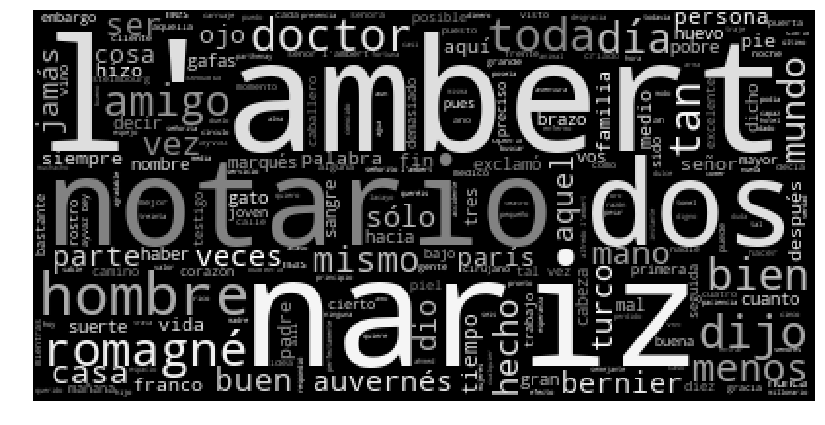

In [58]:
#This gets done jsut for fun, just an image to summarize

import random
#import helpers

import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
#from scipy.misc import imread
from imageio import imread
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS
import re
import io

limit = 1000

font = '/usr/share/fonts/truetype/ubuntu-font-family/Ubuntu-B.ttf'
fontcolor='#fafafa'
bgcolor = '#000000'

def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

wordcloud = WordCloud(
    max_words= 1000,
    stopwords=stop_words,
    background_color=bgcolor
).generate(textofiltrado)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))
plt.title('', color=fontcolor, size=30, y=1.01)
#plt.annotate('', xy=(0, -.025), xycoords='axes fraction', fontsize=12, color=fontcolor)
plt.axis('off')
plt.show()